In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Netflix Userbase (1).csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
pd.DatetimeIndex(df["Join Date"])

DatetimeIndex(['2022-01-15', '2021-05-09', '2023-02-28', '2022-10-07',
               '2023-01-05', '2022-03-18', '2021-09-12', '2023-02-04',
               '2022-10-20', '2023-07-01',
               ...
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-23', '2022-07-25', '2022-04-08', '2022-09-08',
               '2022-12-08', '2022-08-13'],
              dtype='datetime64[ns]', name='Join Date', length=2500, freq=None)

In [7]:
df["Join Date"]=pd.DatetimeIndex(df["Join Date"])
df["Last Payment date"]=pd.DatetimeIndex(df["Last Payment Date"])

In [8]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Last Payment date
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month,2023-10-06
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,1 Month,2023-06-22
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2023-06-27
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,1 Month,2023-06-26
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,1 Month,2023-06-28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   object        
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
 10  Last Payment date  2500 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 215.0+ KB


In [10]:
df ["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

In [11]:
df.drop("Plan Duration",axis=1,inplace=True)

In [12]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Last Payment date
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,2023-10-06
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,2023-06-22
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,2023-06-27
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,2023-06-26
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,2023-06-28


In [13]:
Total_Monthly_Revenue=df["Monthly Revenue"].sum()

In [14]:
print("Total Revenue:", Total_Monthly_Revenue,"$")

Total Revenue: 31271 $


In [15]:
df.sort_values("Monthly Revenue",ascending=False)[["User ID","Monthly Revenue"]].head()

,User ID,Monthly Revenue
2499,2500,15
2334,2335,15
2425,2426,15
2426,2427,15
379,380,15


In [16]:
### Subscription basis check type

In [17]:
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [18]:
rev_sub_type = df.groupby("Subscription Type")["Monthly Revenue"].sum()   #for saving data 

In [19]:
### By checking graphwise

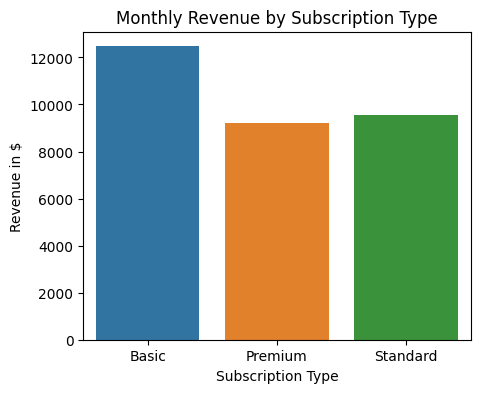

In [20]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Subscription Type")
sns.barplot(x=rev_sub_type.index, y=rev_sub_type.values , hue= rev_sub_type.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [21]:
### On basis of country

In [22]:
rev_sub_type = df.groupby("Country")["Monthly Revenue"].sum()

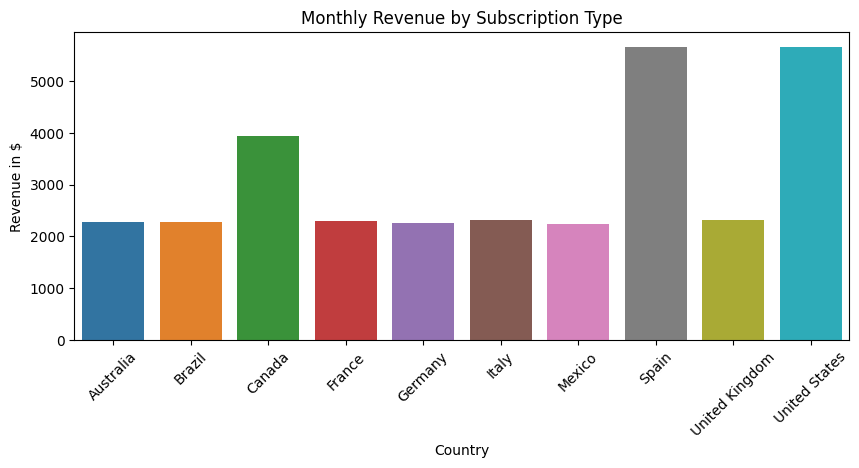

In [23]:
plt.figure(figsize=(10,4))
plt.title("Monthly Revenue by Subscription Type")
sns.barplot(x=rev_sub_type.index, y=rev_sub_type.values , hue= rev_sub_type.index, legend=False)
plt.xticks(rotation = 45)
plt.ylabel("Revenue in $")
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   object        
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Last Payment date  2500 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [25]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Last Payment date
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,2023-10-06
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,2023-06-22
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,2023-06-27
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,2023-06-26
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,2023-06-28


In [26]:
### Create Age Bucket

In [27]:
df["Age"].value_counts()

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [28]:
df["Age"]=pd.cut(df["Age"],bins=3,labels =["25-34","34-42","42-51"])

In [29]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Last Payment date
0,1,Basic,10,2022-01-15,10-06-23,United States,25-34,Male,Smartphone,2023-10-06
1,2,Premium,15,2021-05-09,22-06-23,Canada,34-42,Female,Tablet,2023-06-22
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,34-42,Male,Smart TV,2023-06-27
3,4,Standard,12,2022-10-07,26-06-23,Australia,42-51,Female,Laptop,2023-06-26
4,5,Basic,10,2023-01-05,28-06-23,Germany,25-34,Male,Smartphone,2023-06-28


In [30]:
### Checking higher age group


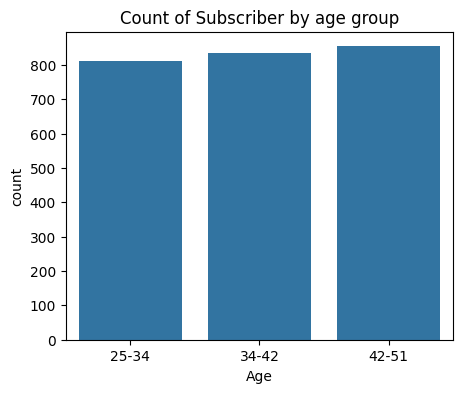

In [31]:
plt.figure(figsize=(5,4))
plt.title("Count of Subscriber by age group")
sns.countplot(x = df["Age"])
plt.show()

In [32]:
### Revenue by Age group

In [33]:
rev_age = df.groupby("Age")["Monthly Revenue"].sum()

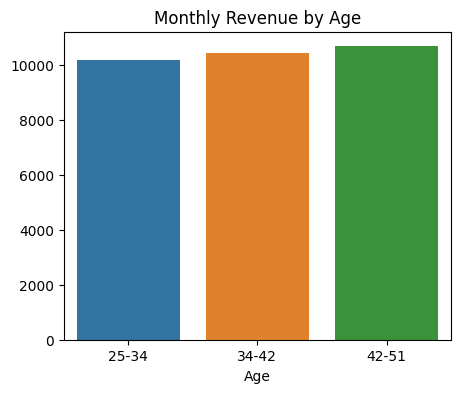

In [34]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Age")
sns.barplot(x=rev_age.index, y=rev_age.values, hue=rev_age.index, legend=False)
plt.show()

In [35]:
### Revenue of Gender

In [36]:
df["Gender"].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [37]:
rev_age = df.groupby("Gender")["Monthly Revenue"].sum()

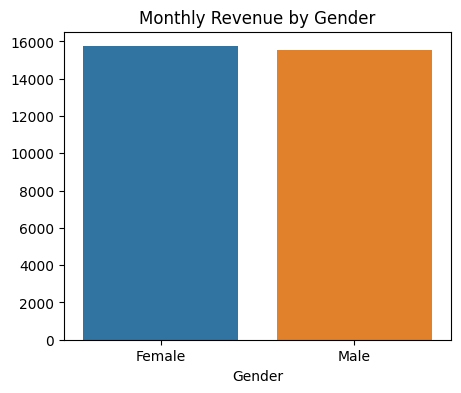

In [38]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Gender")
sns.barplot(x=rev_age.index, y=rev_age.values, hue=rev_age.index, legend=False)
plt.show()

### Device Column

In [39]:
df["Device"].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [40]:
rev_age = df.groupby("Device")["Monthly Revenue"].sum()

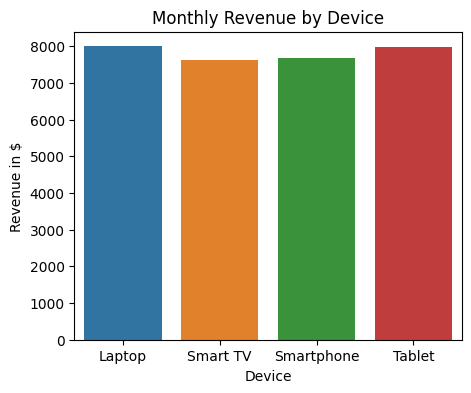

In [41]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Device")
plt.ylabel("Revenue in $")
sns.barplot(x=rev_age.index, y=rev_age.values, hue=rev_age.index, legend=False)
plt.show()

In [42]:
### Duration of data

In [43]:
Join_date = pd.to_datetime(df["Join Date"])
Last_Payment = pd.to_datetime(df["Last Payment Date"])

In [44]:
Duration = Last_Payment - Join_date
Duration

0      629 days
1      774 days
2      119 days
3      262 days
4      174 days
         ...   
2495   500 days
2496   462 days
2497   310 days
2498   364 days
2499   481 days
Length: 2500, dtype: timedelta64[ns]

In [46]:
df["Duration"] = Duration

In [47]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Last Payment date,Duration
0,1,Basic,10,2022-01-15,10-06-23,United States,25-34,Male,Smartphone,2023-10-06,629 days
1,2,Premium,15,2021-05-09,22-06-23,Canada,34-42,Female,Tablet,2023-06-22,774 days
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,34-42,Male,Smart TV,2023-06-27,119 days
3,4,Standard,12,2022-10-07,26-06-23,Australia,42-51,Female,Laptop,2023-06-26,262 days
4,5,Basic,10,2023-01-05,28-06-23,Germany,25-34,Male,Smartphone,2023-06-28,174 days


In [48]:
### To check todays date duration

In [49]:
today = pd.to_datetime("2024-01-27")
last_date = pd.to_datetime("2024-01-04")

In [50]:
today-last_date

Timedelta('23 days 00:00:00')

In [51]:
df["Duration"] .dt.days//30

0       20
1       25
2        3
3        8
4        5
        ..
2495    16
2496    15
2497    10
2498    12
2499    16
Name: Duration, Length: 2500, dtype: int64

In [52]:
df["Duration_Month"]=df["Duration"].dt.days//30

In [53]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Last Payment date,Duration,Duration_Month
0,1,Basic,10,2022-01-15,10-06-23,United States,25-34,Male,Smartphone,2023-10-06,629 days,20
1,2,Premium,15,2021-05-09,22-06-23,Canada,34-42,Female,Tablet,2023-06-22,774 days,25
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,34-42,Male,Smart TV,2023-06-27,119 days,3
3,4,Standard,12,2022-10-07,26-06-23,Australia,42-51,Female,Laptop,2023-06-26,262 days,8
4,5,Basic,10,2023-01-05,28-06-23,Germany,25-34,Male,Smartphone,2023-06-28,174 days,5


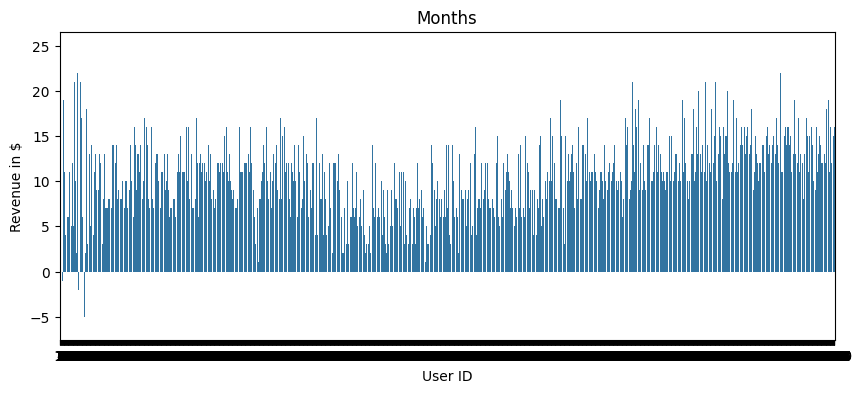

In [54]:
plt.figure(figsize=(10,4))
plt.title("Months")
sns.barplot(x=df["User ID"],y=df["Duration_Month"])
plt.ylabel("Revenue in $")
plt.show()

### Distribution of Months

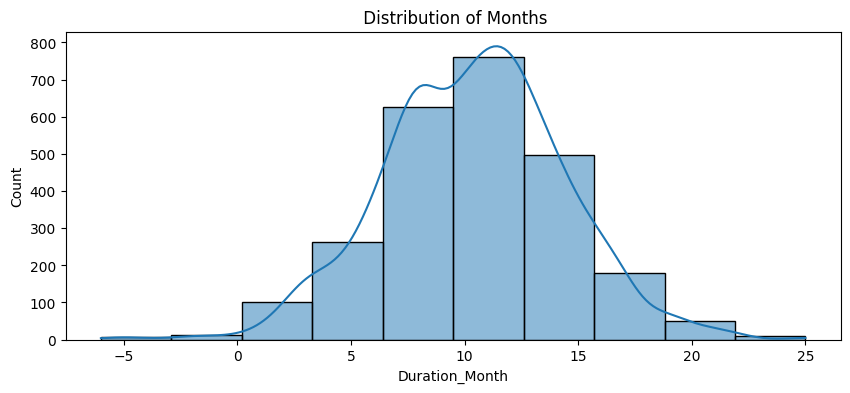

In [55]:
plt.figure(figsize=(10,4))
plt.title(" Distribution of Months")
sns.histplot(df["Duration_Month"],bins=10,kde=True)
plt.show()

In [56]:
# H0: Average customer churn duration is 10 
# Ha: Average customer churn duration is not 10 


In [57]:
from scipy.stats import shapiro

In [58]:
stats, p=shapiro(df["Duration_Month"])
print("shapiro statistical value =", stats)
print("shapiro p value =",p)

alpha = 0.05
if p>alpha:
    print("Average customer churn duration is 10 months(Accept H0)")
else:
    print("Average customer churn duration is  not 10 months(Reject H0)")

shapiro statistical value = 0.9919061660766602
shapiro p value = 1.3147295752080623e-10
Average customer churn duration is  not 10 months(Reject H0)


In [59]:
pd.crosstab(df["Gender"],df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Gender,,,
Female,512,364,381
Male,487,369,387


In [60]:
pd.crosstab(df["Country"],df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [61]:
pd.crosstab(df["Device"],df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Device,,,
Laptop,259,192,185
Smart TV,238,188,184
Smartphone,251,171,199
Tablet,251,182,200
